In [306]:
import pandas as pd
import numpy as np
from datetime import datetime
from iso3166 import countries

df = pd.read_csv('data.csv')

# =============================================================================================
# 1. List the top 10 tracks in the global throughout year 2017 with their total stream counts.
# =============================================================================================
df[pd.to_datetime(df['Date']) < pd.to_datetime('2018-01-01', format='%Y-%m-%d')]
df_2017.groupby("Track Name").sum().sort_values(by='Streams', ascending=False).head(10)[["Streams"]]

,Streams
Track Name,
Shape of You,2954314942
Despacito - Remix,1808988398
Despacito (Featuring Daddy Yankee),1449083311
Something Just Like This,1366414897
Unforgettable,1341220672
HUMBLE.,1288359986
I'm the One,1241605052
rockstar,1186411578
It Ain't Me (with Selena Gomez),1179203261


In [307]:
# =======================================================================================================
# 2. List the top 10 artists (or groups) those has the most stream counts for all their tracks combined, 
#    with the stream counts of each of their tracks.
# =======================================================================================================
df_2017_top10_artists = df_2017.groupby("Artist").sum().sort_values(by='Streams', ascending=False).head(10)
df_2017_top10_artists = df_2017_top10_artists.reset_index()[["Artist", "Streams"]]
print(df_2017_top10_artists)
df_2017_top10_artists_final = pd.merge(df_2017_top10_artists[["Artist"]], df_2017, how='inner',on=["Artist"])[["Artist", "Track Name", "Streams"]]
# print(df_2017_top10_artists_final)
print("\n===== Result: =====")
df_2017_top10_artists_final.groupby(['Artist','Track Name']).sum()

# 不知道如何能保留歌手排名。。

             Artist     Streams
0        Ed Sheeran  8739587055
1             Drake  4499119727
2  The Chainsmokers  4249854428
3       Post Malone  3517577254
4    Kendrick Lamar  3500732789
5        Luis Fonsi  3477767680
6          J Balvin  2444474359
7     Calvin Harris  2382436555
8   Imagine Dragons  2266496410
9         DJ Khaled  2211619142

===== Result: =====


Streams
Artist           Track Name                                                    
Calvin Harris    Blame                                                    28441
                 Cash Out                                               7895128
                 Faking It                                              5389940
                 Faking It - Radio Edit                                   62673
                 Feel So Close - Radio Edit                              287006
                 Feels                                                815519640
                 Hard to Love                                           1156348
                 Heatstroke                                            66958007
                 Holiday                                                2434305
                 How Deep Is Your Love                                  1214741
                 My Way                                               265980473
                 Prayers Up                                             7458663
                 Rollin                                               236561525
                 Skrt On Me                                             4735972
                 Slide                                                782052996
                 Summer                                                    6784
                 The Girls                                                34875
                 This Is What You Came For                            184659038
DJ Khaled        (Intro) I'm so Grateful                                 277571
                 Do You Mind                                              83096
                 Don't Quit                                            22337446
                 Down for Life                                          1198808
                 For Free                                                143765
                 Good Man                                                227563
                 I Can't Even Lie                                       1152628
                 I Love You so Much                                     1455389
                 I'm the One                                         1241605052
                 Iced Out My Arms                                       1675466
                 It's Secured                                           1120711
                 Major Bag Alert                                         652026
...                                                                         ...
Post Malone      White Iverson                                        301955668
                 rockstar                                            1186411578
                 rockstar - Remix                                       1044808
The Chainsmokers #SELFIE                                                  18668
                 All We Know                                          200445572
                 Bloodstream                                           11509574
                 Break Up Every Night                                  61020802
                 Closer                                               900593997
                 Don't Let Me Down                                    405972733
                 Don't Let Me Down - W&W Remix                            21828
                 Don't Say                                             11416020
                 Honest                                                10476809
                 Honest - Gil Glaze Remix                                  4813
                 Inside Out                                              103396
                 It Won't Kill Ya                                      16827487
                 Last Day Alive                                         6726937
                 My Type                                                9563308
                 New York City                                          

In [305]:
# =======================================================================================================
# 3. List the top 10 tracks in December, 2017
#    for each continent (North America, Europe, Asia, South America, Oceania).
# =======================================================================================================
df_2017_Dec = df[pd.to_datetime(df['Date']) < pd.to_datetime('2018-01-01', format='%Y-%m-%d')]
df_2017_Dec = df_2017_Dec[pd.to_datetime(df_2017_Dec['Date']) > pd.to_datetime('2017-11-30', format='%Y-%m-%d')]
countries = pd.read_json('countries.json',typ='frame')

# processing country name to corresponding upper&lower characters
countries.rename(columns=lambda x: x.lower(), inplace=True)
countries = countries.loc["continent"].reset_index()
countries.columns = ["Region", "continent"]

df_merge = pd.merge(df_2017_Dec, countries, how='inner',on=["Region"])[["Track Name", "Artist", "Streams", "Region", "continent"]]
# df_every_continent_every_track_sumStreams = df_merge.groupby(["continent", "Track Name"]).sum().reset_index()
# df_every_continent_every_track_sumStreams[df_every_continent_every_track_sumStreams["Track Name"] == "Shape of You"] 
df_every_continent_every_track_sumStreams = df_merge.groupby(["continent", "Track Name"])["Streams"].sum().reset_index()

df_every_continent_every_track_sumStreams.groupby("continent").apply(lambda x: x.nlargest(10, columns="Streams"))


continent                                         Track Name  \
continent                                                                     
AS        388         AS                                             Havana   
          989         AS                               Too Good At Goodbyes   
          731         AS                                            Perfect   
          1073        AS                                             Wolves   
          670         AS                                          New Rules   
          1043        AS                         What Lovers Do (feat. SZA)   
          733         AS                Perfect Duet (Ed Sheeran & Beyoncé)   
          555         AS  Let Me Go (with Alesso, Florida Georgia Line &...   
          1109        AS                                 Young Dumb & Broke   
          283         AS                        Dusk Till Dawn - Radio Edit   
EU        5109        EU                                           rockstar   
          1690        EU                    All I Want for Christmas Is You   
          2687        EU                                             Havana   
          3273        EU                                     Last Christmas   
          3942        EU                Perfect Duet (Ed Sheeran & Beyoncé)   
          3318        EU                                       Let You Down   
          5025        EU                                             Wolves   
          3696        EU                                          New Rules   
          3940        EU                                            Perfect   
          4122        EU                           River (feat. Ed Sheeran)   
NA        6197        NA                                           rockstar   
          5533        NA                                         Gucci Gang   
          5546        NA                                             Havana   
          5574        NA                                       I Fall Apart   
          5804        NA                                           No Limit   
          5925        NA                    Ric Flair Drip (& Metro Boomin)   
          5210        NA                    All I Want for Christmas Is You   
          5559        NA                              Him & I (with Halsey)   
          6095        NA                               Too Good At Goodbyes   
          5307        NA                                        Candy Paint   
OC        6435        OC                                       Let You Down   
          6696        OC                                           rockstar   
          6384        OC                                       I Fall Apart   
          6360        OC                                             Havana   
          6575        OC                                            Silence   
          6682        OC                                             Wolves   
          6668        OC                         What Lovers Do (feat. SZA)   
          6692        OC                                 Young Dumb & Broke   
          6492        OC                                          New Rules   
          6433        OC  Let Me Go (with Alesso, Florida Georgia Line &...   
SA        6988        SA                                           Downtown   
          7728        SA                                    Échame La Culpa   
          7672        SA  Vai malandra (feat. Tropkillaz e DJ Yuri Martins)   
          6927        SA                                            Corazón   
          7517        SA                                        Sensualidad   
          6934        SA                                           Criminal   
          7107        SA                                             Havana   
          7340        SA                                          New Rules   
          6994        SA            Déjala Que Vuelva (feat. Manu

In [296]:
# =======================================================================================================
# 4. Plot the ranking changes of the Ed Sheeran's "Shape of You" alongside with the stream count changes.
# =======================================================================================================

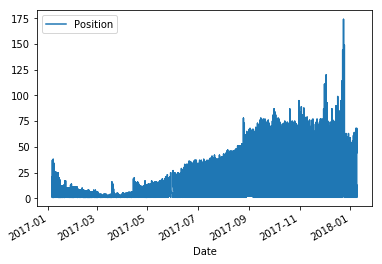

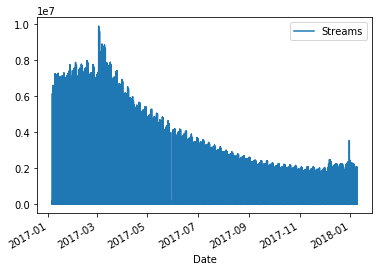

In [257]:
df.Date = pd.to_datetime(df.Date)
filtered = df[df["Track Name"] == "Shape of You"]
# type(filtered.iloc[0]["Date"])
filtered = filtered[["Date", "Streams", "Position"]]
filtered.plot(x='Date', y='Position')
filtered.plot(x='Date', y='Streams')